In [1]:
import pandas as pd
import numpy as np
import warnings
from pandas import read_csv, set_option
from pandas import Series, datetime
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
import seaborn as sns

In [2]:
# Load the stock prices dataset into a dataframe and check the top 5 rows
stock_prices = "DJIA_table_with_start.csv"
stock_data = pd.read_csv(stock_prices, parse_dates=[0])
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,start_trend
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031,0
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961,0
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973,0
3,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996,0
4,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969,0


In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arupatil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Next, we perform sentiment analysis using Vader library. The process takes couple of hours so the data has been stored to a .csv file and combined with the dataset. 

In [4]:
data = pd.read_csv('combined with sentiment.csv', parse_dates=[0])
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23 neutral,Top23 negative,Top24 CompoundValue,Top24 positive,Top24 neutral,Top24 negative,Top25 CompoundValue,Top25 positive,Top25 neutral,Top25 negative
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.860,0.140,-0.8519,0.000,0.350,0.650,0.4019,0.351,0.649,0.000
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.753,0.247,-0.1832,0.263,0.414,0.323,0.0000,0.000,1.000,0.000
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.785,0.074,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.598,0.402,-0.4215,0.000,0.823,0.177,-0.3400,0.000,0.806,0.194
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,0.571,0.181,-0.6908,0.000,0.427,0.573,0.7096,0.349,0.651,0.000


In [5]:
#extracting date, label, and Compound sentiment scores
first = data.loc[ : , ['Date', 'Label'] ]
first
cols = data.filter(regex=("CompoundValue"))
cols.head()
sentiment_data = first.merge(cols, how='inner', left_index = True, right_index=True)
sentiment_data.head()

,Date,Label,Top1 CompoundValue,Top2 CompoundValue,Top3 CompoundValue,Top4 CompoundValue,Top5 CompoundValue,Top6 CompoundValue,Top7 CompoundValue,Top8 CompoundValue,...,Top16 CompoundValue,Top17 CompoundValue,Top18 CompoundValue,Top19 CompoundValue,Top20 CompoundValue,Top21 CompoundValue,Top22 CompoundValue,Top23 CompoundValue,Top24 CompoundValue,Top25 CompoundValue
0,2008-08-08,0,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,...,0.0000,0.0,0.2086,0.2023,0.0258,-0.7579,-0.6249,-0.2755,-0.8519,0.4019
1,2008-08-11,1,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,...,0.0000,0.0,-0.6597,0.0000,0.0000,-0.8020,0.0000,-0.3182,-0.1832,0.0000
2,2008-08-12,0,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,...,0.0000,0.0,0.0772,-0.5994,-0.5859,0.0000,0.5267,0.3818,0.0000,0.0000
3,2008-08-13,0,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.2960,0.0000,...,0.0000,0.0,0.0000,-0.5423,-0.0258,-0.2960,0.4939,-0.5719,-0.4215,-0.3400
4,2008-08-14,1,0.2023,0.0000,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,...,-0.6249,0.0,0.0000,0.0000,0.0000,-0.4404,-0.5994,0.1779,-0.6908,0.7096


In [6]:
# Push the Label column to the end of the dataframe
cols = list(sentiment_data)
#print(cols)
cols.append(cols.pop(cols.index('Label')))
sentiment_data = sentiment_data.loc[:, cols]
sentiment_data.head()

,Date,Top1 CompoundValue,Top2 CompoundValue,Top3 CompoundValue,Top4 CompoundValue,Top5 CompoundValue,Top6 CompoundValue,Top7 CompoundValue,Top8 CompoundValue,Top9 CompoundValue,...,Top17 CompoundValue,Top18 CompoundValue,Top19 CompoundValue,Top20 CompoundValue,Top21 CompoundValue,Top22 CompoundValue,Top23 CompoundValue,Top24 CompoundValue,Top25 CompoundValue,Label
0,2008-08-08,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,-0.5719,...,0.0,0.2086,0.2023,0.0258,-0.7579,-0.6249,-0.2755,-0.8519,0.4019,0
1,2008-08-11,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,-0.6688,...,0.0,-0.6597,0.0000,0.0000,-0.8020,0.0000,-0.3182,-0.1832,0.0000,1
2,2008-08-12,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,...,0.0,0.0772,-0.5994,-0.5859,0.0000,0.5267,0.3818,0.0000,0.0000,0
3,2008-08-13,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.2960,0.0000,0.3612,...,0.0,0.0000,-0.5423,-0.0258,-0.2960,0.4939,-0.5719,-0.4215,-0.3400,0
4,2008-08-14,0.2023,0.0000,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,-0.6808,...,0.0,0.0000,0.0000,0.0000,-0.4404,-0.5994,0.1779,-0.6908,0.7096,1


In [7]:
# Create a dataframe by merging the headlines, sentiment scores and the stock prices dataframes
merged_df = pd.merge(stock_data, sentiment_data, on='Date', how='inner')

# Check the shape and top 5 rows of the merged dataframe
#print(merged_df.shape)
#merged_df.head()

In [8]:
# Change the datatype of the volume column to float

merged_df['Volume'] = merged_df['Volume'].astype(float)
merged_df.index = merged_df.index.sort_values()
#merged_df.head()

In [9]:
corr_matrix = merged_df.corr()

In [10]:
corr_matrix['Label'].sort_values(ascending = False)

Label                  1.000000
start_trend            0.259457
Top19 CompoundValue    0.037685
Top13 CompoundValue    0.035115
Top3 CompoundValue     0.033433
Top15 CompoundValue    0.033031
Top9 CompoundValue     0.027819
Top8 CompoundValue     0.024837
Close                  0.016811
Adj Close              0.016811
Top1 CompoundValue     0.016436
Top2 CompoundValue     0.010949
Top6 CompoundValue     0.010780
Top18 CompoundValue    0.008383
Top12 CompoundValue    0.007883
Top24 CompoundValue    0.007863
Top23 CompoundValue    0.006354
Low                    0.004600
Top10 CompoundValue    0.004511
Top14 CompoundValue    0.002432
Top5 CompoundValue     0.001359
High                   0.000685
Top11 CompoundValue   -0.001757
Top20 CompoundValue   -0.003243
Top21 CompoundValue   -0.005632
Top7 CompoundValue    -0.005840
Top4 CompoundValue    -0.008716
Top16 CompoundValue   -0.012309
Open                  -0.014490
Top22 CompoundValue   -0.014968
Top25 CompoundValue   -0.035466
Top17 Co

start_trend = (Closing Value of Previous day stock market - Opening Value of current day stock market) 'start_trend' value is a binary variable with values: 1 = positive trend 0 = negative trend

The corelation matrix shows that the start_trend value is the most important predictor of the target variable followed by the sentiment value(compound value) of the Top19, Top13, Top3, Top15, Top9, Top8,Top1, Top2, Top6 headlines and Close, Adj Close values.

In [11]:
X, y = merged_df.iloc[:,:-1],merged_df.iloc[:,-1]

We will split this dataset into 80% train and 20% test. As this is a time series, we are not randomly picking the training and testing samples. The model will be trained using the train set, model hyperparameters will be tuned and finally the performance of the model will be reported using the test set. 

In [12]:
# Split the dataset to test and train sets
# Split the initial 80% of the data as training set and the remaining 20% data as the testing set
train_size = int(len(X.index) * 0.8)
print(len(y))
print(train_size)
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
 
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]


1989
1591


In [13]:
print(X_train.shape)
print(X_test.shape)

(1591, 33)
(398, 33)


In [14]:
print(y_train.shape)
print(y_test.shape)

(1591,)
(398,)


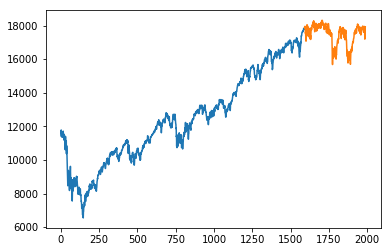

In [15]:
#Below plot shows the opening price split up into the respective train and test sets.
plt.plot(X_train['Open'])
plt.plot([None for i in X_train['Open']] + [x for x in X_test['Open']])


In [16]:
X_train=X_train.drop(['Date'],axis=1)
X_test=X_test.drop(['Date'],axis=1)

Stochastic Gradient Descent Classifier

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

In [18]:
sgd_clf.fit(X_train, y_train)

C:\Users\arupatil\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
y_pred1 = sgd_clf.predict(X_test)

In [22]:
y_pred1 = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.25%


XG Boost Classifier

In [23]:
#Baseline model
xgb1 = xgb.XGBClassifier()

In [24]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
y_pred2 = xgb1.predict(X_test)

In [26]:
y_pred2 = [round(value) for value in y_pred2]
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.29%


Fine Tuning XGBoost parameters

In [27]:
#Fix learning rate and number of estimators for tuning tree-based parameters
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb2.fit(X_train, y_train)
y_pred3 = xgb2.predict(X_test)
y_pred3 = [round(value) for value in y_pred3]
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.55%


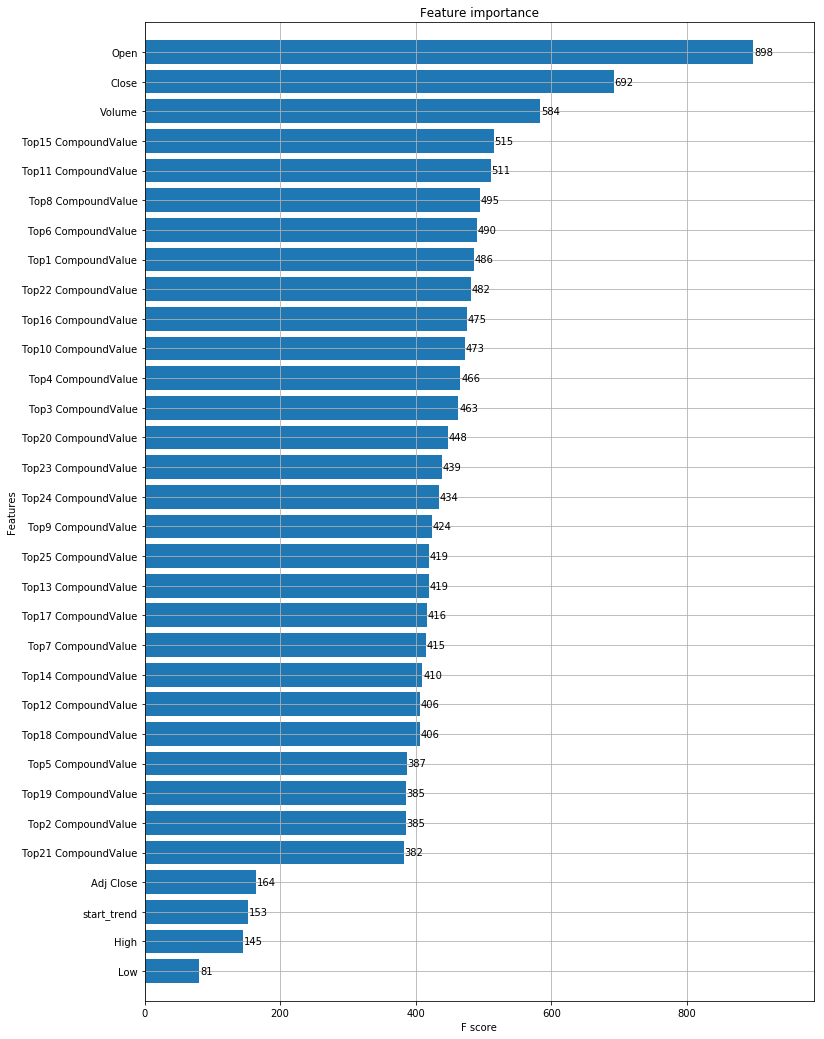

In [28]:
#Plotting Feature importance for Xgboost model
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgb2, max_num_features=50, height=0.8, ax=ax)
plt.show()

Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [30]:
forest_clf.fit(X_train, y_train)

C:\Users\arupatil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
y_pred4 = forest_clf.predict(X_test)

In [32]:
y_pred4 = [round(value) for value in y_pred4]
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.26%
